# importing the libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# function to read a df

In [1]:
import pandas as pd

def read_csv_to_dataframe(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print("An error occurred:", e)
        return None

In [2]:
df=read_csv_to_dataframe('/home/nalin21478/ML-Flight-Delay-Prediction/Data/M1_final.csv')

In [3]:
df.columns


Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'DEST', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M',
       'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity',
       'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'sch_dep',
       'sch_arr', 'TAXI_OUT'],
      dtype='object')

# dropping unnecessary columns

In [4]:
columns_to_drop = ['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M','TAXI_OUT']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# checking for missing data

In [5]:
def check_missing_data(df):
    missing_data = df.isnull().sum().sort_values(ascending=False)
    percent_missing = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_data = pd.concat([missing_data, percent_missing], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [6]:
check_missing_data(df)

,Total,Percent
Wind,2,0.00694
MONTH,0,0.00000
Humidity,0,0.00000
sch_dep,0,0.00000
Condition,0,0.00000
Pressure,0,0.00000
Wind Gust,0,0.00000
Wind Speed,0,0.00000
Dew Point,0,0.00000
DAY_OF_MONTH,0,0.00000


# dropping missing data

In [7]:
no_nan_df=df.dropna()

In [8]:
len(no_nan_df['Condition'].unique())

25

# checking categorical columns

In [9]:
category_columns = no_nan_df.select_dtypes(include=['object']).columns

In [10]:
category_columns

Index(['DEST', 'Dew Point', 'Wind', 'Condition'], dtype='object')

# changing dew point to numeric

In [11]:
def convert_to_numeric_and_remove_invalid(df, column_name):

    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    

    df = df.dropna(subset=[column_name])
    
    return df


In [12]:
no_nan_df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr
0,11,1,5,CHS,-1,124,636,48,34,58,W,25,38,29.86,Fair / Windy,9,17
1,11,1,5,LAX,-7,371,2475,48,34,58,W,25,38,29.86,Fair / Windy,9,17
2,11,1,5,FLL,40,181,1069,48,34,58,W,25,38,29.86,Fair / Windy,9,17
3,11,1,5,MCO,-2,168,944,48,34,58,W,25,38,29.86,Fair / Windy,9,17
4,11,1,5,ATL,-4,139,760,46,32,58,W,24,35,29.91,Fair / Windy,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,ORH,2,57,150,39,38,96,N,6,0,30.18,Cloudy,20,32
28816,1,31,5,BOS,2,75,187,39,38,96,N,6,0,30.18,Cloudy,19,23
28817,1,31,5,SEA,283,392,2422,39,38,96,N,6,0,30.18,Cloudy,19,23
28818,1,31,5,SJU,5,224,1598,39,38,96,N,6,0,30.18,Cloudy,19,23


In [27]:
no_nan_df=convert_to_numeric_and_remove_invalid(no_nan_df, 'Dew Point')

/tmp/ipykernel_12794/3572384750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = pd.to_numeric(df[column_name], errors='coerce')


# creating a new column for classification ground truth

In [28]:
def ground_truth_conversion(df, column_name,new_column_name):
    df[new_column_name] = df[column_name].apply(lambda x: 1 if x > 15 else 0)
    return df

In [29]:
no_nan_df=ground_truth_conversion(no_nan_df, 'DEP_DELAY', 'Delayed')

In [30]:
no_nan_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,Delayed
0,11,1,5,CHS,-1,124,636,48,34.0,58,W,25,38,29.86,Fair / Windy,9,17,0
1,11,1,5,LAX,-7,371,2475,48,34.0,58,W,25,38,29.86,Fair / Windy,9,17,0
2,11,1,5,FLL,40,181,1069,48,34.0,58,W,25,38,29.86,Fair / Windy,9,17,1
3,11,1,5,MCO,-2,168,944,48,34.0,58,W,25,38,29.86,Fair / Windy,9,17,0
4,11,1,5,ATL,-4,139,760,46,32.0,58,W,24,35,29.91,Fair / Windy,9,17,0


# moving dep_delay to the end

In [31]:
def move_column_to_end(df, column_name):
    column = df.pop(column_name)
    df[column_name] = column
    return df

In [32]:
no_nan_df=move_column_to_end(no_nan_df, 'DEP_DELAY')

In [18]:
no_nan_df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEST,CRS_ELAPSED_TIME,DISTANCE,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,DEP_DELAY
0,11,1,5,CHS,124,636,48,34.0,58,W,25,38,29.86,Fair / Windy,9,17,0
1,11,1,5,LAX,371,2475,48,34.0,58,W,25,38,29.86,Fair / Windy,9,17,0
2,11,1,5,FLL,181,1069,48,34.0,58,W,25,38,29.86,Fair / Windy,9,17,1
3,11,1,5,MCO,168,944,48,34.0,58,W,25,38,29.86,Fair / Windy,9,17,0
4,11,1,5,ATL,139,760,46,32.0,58,W,24,35,29.91,Fair / Windy,9,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,ORH,57,150,39,38.0,96,N,6,0,30.18,Cloudy,20,32,0
28816,1,31,5,BOS,75,187,39,38.0,96,N,6,0,30.18,Cloudy,19,23,0
28817,1,31,5,SEA,392,2422,39,38.0,96,N,6,0,30.18,Cloudy,19,23,1
28818,1,31,5,SJU,224,1598,39,38.0,96,N,6,0,30.18,Cloudy,19,23,0


In [19]:
no_nan_df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEST', 'CRS_ELAPSED_TIME',
       'DISTANCE', 'Temperature', 'Dew Point', 'Humidity', 'Wind',
       'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'sch_dep',
       'sch_arr', 'DEP_DELAY'],
      dtype='object')

In [20]:
columns_to_be_plotted=['CRS_ELAPSED_TIME',
       'DISTANCE', 'Temperature', 'Dew Point', 'Humidity',
       'Wind Speed', 'Wind Gust', 'Pressure',  'sch_dep',
       'sch_arr']

# plotting box plots

In [21]:
import os
output_folder_box = '/home/nalin21478/ML-Flight-Delay-Prediction/plots/boxplots_2'
os.makedirs(output_folder_box, exist_ok=True)
for column in columns_to_be_plotted:
    plt.figure(figsize=(8, 6))
    plt.boxplot(data=no_nan_df,x=no_nan_df[column])
    plt.title(f'Box plot for {column}')
    plt.savefig(os.path.join(output_folder_box, f'{column}_boxplot.png'))
    plt.close()

# plotting correlation heatmap

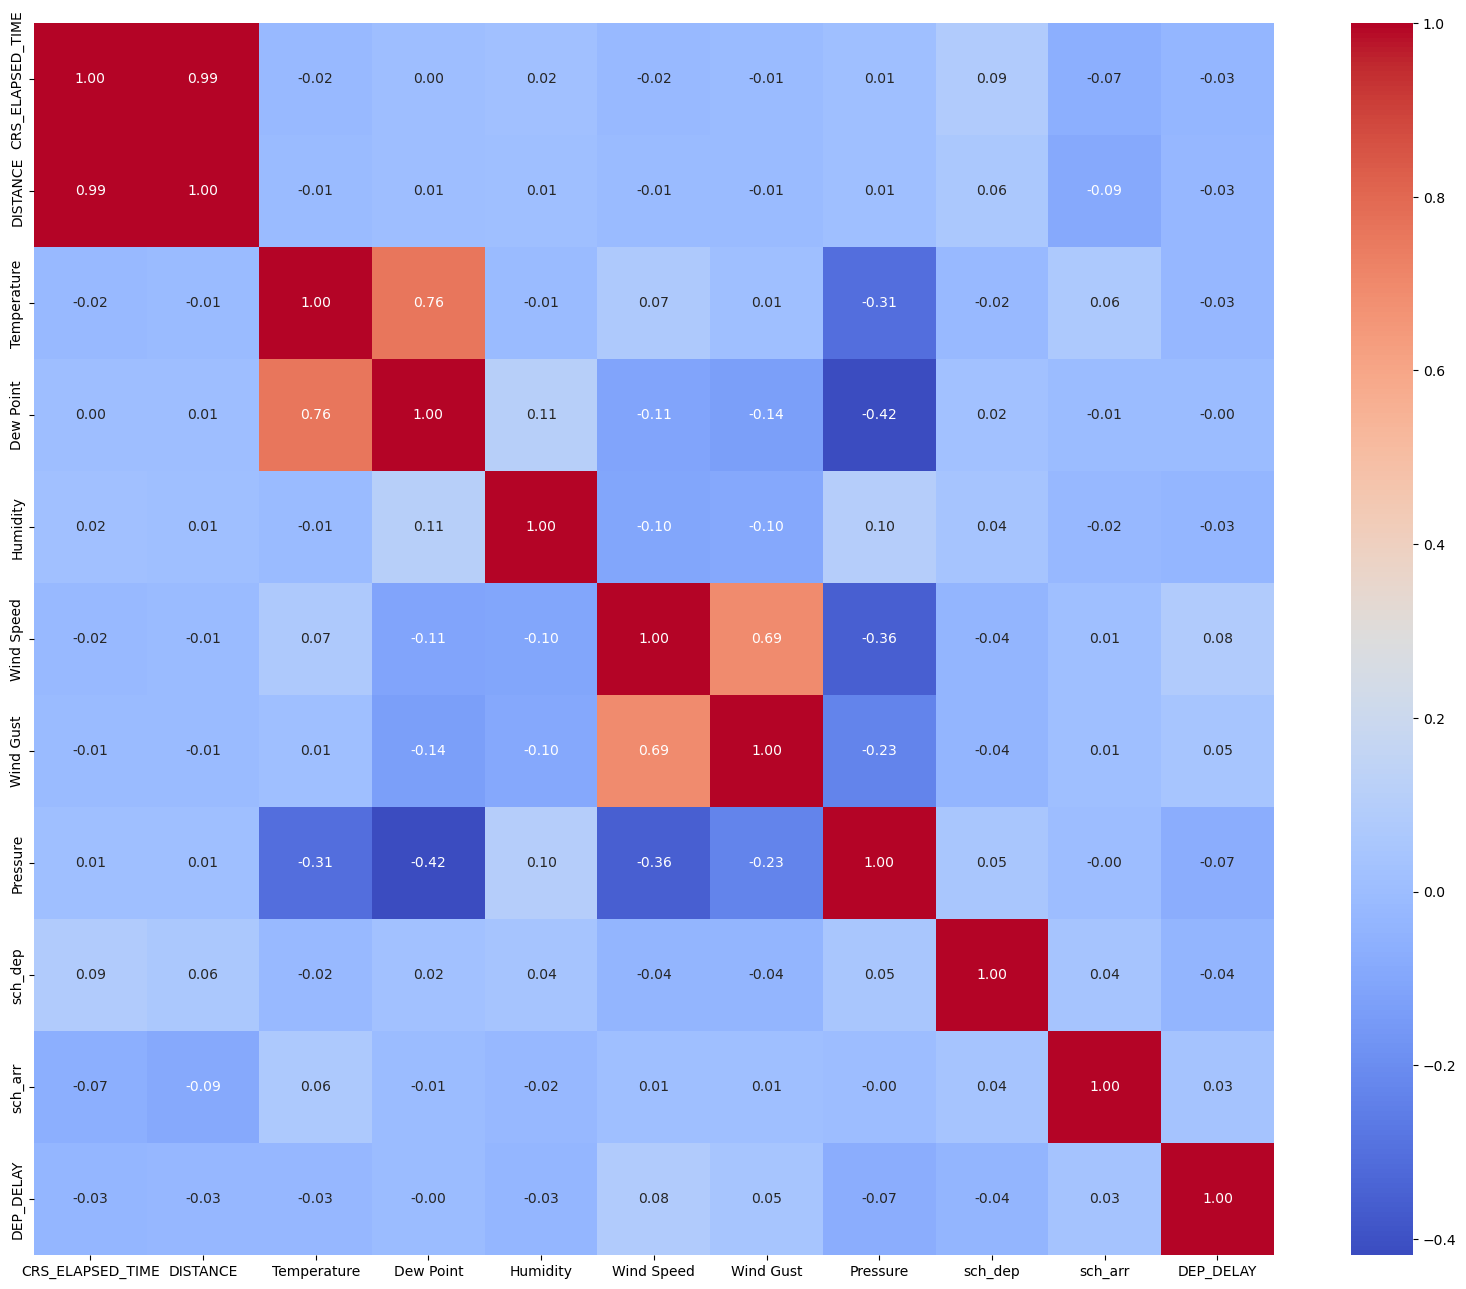

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import os


columns_to_exclude = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEST','Condition','Wind']


depart_delay_classification_df_filtered = no_nan_df.drop(columns=columns_to_exclude)


corr_matrix = depart_delay_classification_df_filtered.corr()

plt.figure(figsize=(20, 2*8))


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")


output_folder_path = '//home/nalin21478/ML-Flight-Delay-Prediction/plots/Heatmap'

os.makedirs(output_folder_path, exist_ok=True)


plt.savefig(os.path.join(output_folder_path, 'heatmap_2.png'))


plt.show()


# standardizing numerical columns

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

depart_delay_classification_scaled_df=no_nan_df.copy()
columns_to_be_scaled=['CRS_ELAPSED_TIME',
       'DISTANCE', 'Temperature', 'Dew Point', 'Humidity',
       'Wind Speed', 'Wind Gust', 'Pressure',  'sch_dep',
       'sch_arr']
depart_delay_classification_scaled_df[columns_to_be_scaled] = scaler.fit_transform(depart_delay_classification_scaled_df[columns_to_be_scaled])

In [34]:
category_columns = depart_delay_classification_scaled_df.select_dtypes(include=['object']).columns

In [35]:
category_columns

Index(['DEST', 'Wind', 'Condition'], dtype='object')

# Label encoding the columns

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

depart_delay_classification_scaled_encoded_df=depart_delay_classification_scaled_df.copy()
depart_delay_classification_scaled_encoded_df['DEST'] = label_encoder.fit_transform(depart_delay_classification_scaled_encoded_df['DEST'])
depart_delay_classification_scaled_encoded_df['Wind'] = label_encoder.fit_transform(depart_delay_classification_scaled_encoded_df['Wind'])
depart_delay_classification_scaled_encoded_df['Condition'] = label_encoder.fit_transform(depart_delay_classification_scaled_encoded_df['Condition'])

In [37]:
depart_delay_classification_scaled_encoded_df.to_csv('/home/nalin21478/ML-Flight-Delay-Prediction/Data/scaled_regression_classification', index=False)

# class imbalance plot

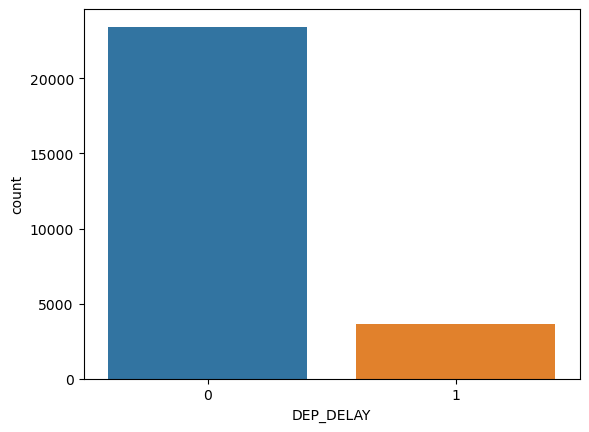

In [28]:
import seaborn as sns

sns.countplot(x=depart_delay_classification_scaled_encoded_df['DEP_DELAY'])
plt.show()

In [30]:
depart_delay_classification_scaled_encoded_df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEST,CRS_ELAPSED_TIME,DISTANCE,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,DEP_DELAY
0,11,1,5,10,-0.848855,-0.711515,0.761435,0.184485,-0.038486,15,2.069328,2.821704,-0.727985,3,-2.330480,-1.390801,0
1,11,1,5,28,1.217334,1.354774,0.761435,0.184485,-0.038486,15,2.069328,2.821704,-0.727985,3,-2.330480,-1.390801,0
2,11,1,5,20,-0.372043,-0.224999,0.761435,0.184485,-0.038486,15,2.069328,2.821704,-0.727985,3,-2.330480,-1.390801,1
3,11,1,5,30,-0.480789,-0.365448,0.761435,0.184485,-0.038486,15,2.069328,2.821704,-0.727985,3,-2.330480,-1.390801,0
4,11,1,5,1,-0.723378,-0.572189,0.494669,0.002399,-0.038486,15,1.907431,2.563372,-0.555007,3,-2.330480,-1.390801,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,38,-1.409320,-1.257582,-0.439013,0.548656,1.572274,4,-1.006707,-0.450508,0.379074,0,-1.168771,0.427872,0
28816,1,31,5,4,-1.258747,-1.216009,-0.439013,0.548656,1.572274,4,-1.006707,-0.450508,0.379074,0,-1.274381,-0.663332,0
28817,1,31,5,55,1.393002,1.295224,-0.439013,0.548656,1.572274,4,-1.006707,-0.450508,0.379074,0,-1.274381,-0.663332,1
28818,1,31,5,58,-0.012342,0.369382,-0.439013,0.548656,1.572274,4,-1.006707,-0.450508,0.379074,0,-1.274381,-0.663332,0


# function to do k fold

In [32]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import KFold
import os
import joblib
output_folder_box = '/home/nalin21478/ML-Flight-Delay-Prediction/plots/roc'
os.makedirs(output_folder_box, exist_ok=True)

def evaluate_classifier_with_kfold(X_train, y_train, X_test, y_test, classifier, num_folds=10,model_name=None):

    k_fold = KFold(n_splits=num_folds, shuffle=True, random_state=0)

    accuracies = []
    tprs = []
    aucs = []

    for train_indices, val_indices in k_fold.split(X_train, y_train):
        # X_fold_train, X_fold_val = X_train[train_indices], X_train[val_indices]
        # y_fold_train, y_fold_val = y_train[train_indices], y_train[val_indices]
        X_fold_train, X_fold_val = X_train.iloc[train_indices], X_train.iloc[val_indices]
        y_fold_train, y_fold_val = y_train.iloc[train_indices], y_train.iloc[val_indices]

        classifier.fit(X_fold_train, y_fold_train)

        y_val_pred = classifier.predict(X_fold_val)

        fold_accuracy = accuracy_score(y_fold_val, y_val_pred)
        accuracies.append(fold_accuracy)

    average_accuracy = sum(accuracies) / num_folds
    print(f'Average Accuracy Train: {average_accuracy*100:.2f}%')

    y_pred = classifier.predict(X_test)
    y_pred_prob = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy Test: {accuracy*100:.2f}%')

    class_report = classification_report(y_test, y_pred)
    print('Classification Report:')
    print(class_report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(conf_matrix)

    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.title(f'{classifier}_ROC_AUC_plot')
    plt.savefig(os.path.join(output_folder_box, f'{classifier}_ROC_AUC.png'))
    plt.close()
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(conf_matrix)
    
    if model_name is not None:
        joblib.dump(classifier, f'{model_name}.pkl') 
    return class_report,confusion_matrix



# splitting the data

In [33]:
from sklearn.model_selection import train_test_split


X = depart_delay_classification_scaled_encoded_df.iloc[:, :-1]  # Select all columns except the last one as features
y = depart_delay_classification_scaled_encoded_df.iloc[:, -1]   # Select the last column as labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset the index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)


# decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
print("DECISION TREE \n")
decision_tree_gini=DecisionTreeClassifier()
dt_gini_report,dt_gini_matrix=evaluate_classifier_with_kfold(X_train, y_train, X_test, y_test, decision_tree_gini, num_folds=10,model_name='decision_tree_imbalanced')


DECISION TREE GINI 

Average Accuracy Train: 79.79%
Accuracy Test: 79.61%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4689
           1       0.25      0.27      0.26       730

    accuracy                           0.80      5419
   macro avg       0.57      0.57      0.57      5419
weighted avg       0.80      0.80      0.80      5419

Confusion Matrix:
[[4119  570]
 [ 535  195]]
Confusion Matrix:
[[4119  570]
 [ 535  195]]


# random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
print("RANDOM FOREST CLASSIFIER \n")
random_forest_classifier = RandomForestClassifier()

random_forest_classifier_report,random_forest_classifier_matrix=evaluate_classifier_with_kfold(X_train, y_train, X_test, y_test, random_forest_classifier, num_folds=10,model_name='random_forest_imbalanced')


RANDOM FOREST CLASSIFIER 

Average Accuracy Train: 86.00%
Accuracy Test: 85.33%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4689
           1       0.39      0.17      0.23       730

    accuracy                           0.85      5419
   macro avg       0.64      0.56      0.58      5419
weighted avg       0.82      0.85      0.83      5419

Confusion Matrix:
[[4503  186]
 [ 609  121]]
Confusion Matrix:
[[4503  186]
 [ 609  121]]


# naive bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
print("NAIVE BAYES CLASSIFIER \n")



# Initialize the Naive Bayes Classifier
nb_classifier = GaussianNB()

nb_classifier_report,nb_classifier_matrix=evaluate_classifier_with_kfold(X_train, y_train, X_test, y_test, nb_classifier, num_folds=10,model_name='nb_classifier_imbalanced')



SyntaxError: unterminated string literal (detected at line 9) (4051527109.py, line 9)

# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier



knn_classifier = KNeighborsClassifier()




print("KNN CLASSIFIER \n")
knn_classifier_report,knn_classifier_matrix=evaluate_classifier_with_kfold(X_train, y_train, X_test, y_test, knn_classifier, num_folds=10,model_name='knn_classifier_imbalanced')


KNN CLASSIFIER 



Average Accuracy Train: 85.35%
Accuracy Test: 85.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      4689
           1       0.28      0.07      0.11       730

    accuracy                           0.85      5419
   macro avg       0.57      0.52      0.51      5419
weighted avg       0.79      0.85      0.81      5419

Confusion Matrix:
[[4555  134]
 [ 679   51]]
Confusion Matrix:
[[4555  134]
 [ 679   51]]


# Gradient Boost

In [42]:
from sklearn.ensemble import GradientBoostingClassifier


# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
print("GRADIENT BOOSTING CLASSIFIER \n")
gb_classifier_report,gb_classifier_matrix=evaluate_classifier_with_kfold(X_train, y_train, X_test, y_test, gb_classifier, num_folds=10,model_name='gb_classifier_imbalanced')



GRADIENT BOOSTING CLASSIFIER 

Average Accuracy Train: 87.20%
Accuracy Test: 87.08%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4689
           1       0.71      0.07      0.13       730

    accuracy                           0.87      5419
   macro avg       0.79      0.53      0.53      5419
weighted avg       0.85      0.87      0.82      5419

Confusion Matrix:
[[4668   21]
 [ 679   51]]
Confusion Matrix:
[[4668   21]
 [ 679   51]]


# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


ab_classifier = AdaBoostClassifier()
print("ADABOOST CLASSIFIER \n")
ab_classifier_report,ab_classifier_matrix=evaluate_classifier_with_kfold(X_train, y_train, X_test, y_test, ab_classifier, num_folds=10,model_name='ab_classifier_imbalanced')
# 

ADABOOST CLASSIFIER 

Average Accuracy Train: 86.83%
Accuracy Test: 86.90%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4689
           1       0.74      0.04      0.08       730

    accuracy                           0.87      5419
   macro avg       0.80      0.52      0.50      5419
weighted avg       0.85      0.87      0.82      5419

Confusion Matrix:
[[4678   11]
 [ 699   31]]
Confusion Matrix:
[[4678   11]
 [ 699   31]]


# SVM

In [43]:
print("SVM CLASSIFIER \n")
from sklearn.svm import SVC
svm__linear_classifier = SVC(probability=True)

svm__linear_classifier_report,svm__linear_classifier_matrix=evaluate_classifier_with_kfold(X_train, y_train, X_test, y_test, svm__linear_classifier, num_folds=10,model_name='svm__linear_classifier_imbalanced')


SVM CLASSIFIER 



Average Accuracy Train: 86.52%
Accuracy Test: 86.53%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4689
           1       0.00      0.00      0.00       730

    accuracy                           0.87      5419
   macro avg       0.43      0.50      0.46      5419
weighted avg       0.75      0.87      0.80      5419

Confusion Matrix:
[[4689    0]
 [ 730    0]]
Confusion Matrix:
[[4689    0]
 [ 730    0]]


/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression

logistic_regression_classifier = LogisticRegression()

print("LOGISTIC REGRESSION CLASSIFIER \n")
logistic_regression_report, logistic_regression_matrix = evaluate_classifier_with_kfold(X_train, y_train, X_test, y_test, logistic_regression_classifier, num_folds=10,model_name='logistic_regression_classifier_imbalanced')


LOGISTIC REGRESSION CLASSIFIER 



/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nalin21478/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Average Accuracy Train: 86.52%
Accuracy Test: 86.53%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4689
           1       0.00      0.00      0.00       730

    accuracy                           0.87      5419
   macro avg       0.43      0.50      0.46      5419
weighted avg       0.75      0.87      0.80      5419

Confusion Matrix:
[[4689    0]
 [ 730    0]]
Confusion Matrix:
[[4689    0]
 [ 730    0]]
